# 데이터 출처와 소개
- kaggle의 Instacart Market Basket Analysis 데이터를 주제로 한 Instacart market basket analysis -EDA의 NoteBook필사입니다.
- 최신 버전으로의 단어 선택, 그래프 제목 등 약간의 수정이 있습니다.
- 출처 링크: https://www.kaggle.com/competitions/instacart-market-basket-analysis
- 필사 링크: https://www.kaggle.com/code/soheilhosseini/instacart-market-basket-analysis-eda
- Instacart는 당일 식료품 배송 서비스를 운영하는 미국 회사입니다. 고객이 웹 애플리케이션을 통해 다양한 소매업체의 식료품을 선택하면 퍼스널 쇼퍼가 배송합니다. Instacart의 서비스는 주로 스마트폰 앱을 통해 제공되며, 웹사이트와는 별도로 iOS 및 Android 플랫폼에서 사용할 수 있습니다. 이 커널의 목표는 대회 참가자들은 이전에 구매한 제품 중 어떤 제품이 사용자의 다음 주문에 포함될지 예측해야 합니다.

# 라이브러리, 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('data_real/instacart-market-basket-analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data_real/instacart-market-basket-analysis\aisles.csv.zip
data_real/instacart-market-basket-analysis\departments.csv.zip
data_real/instacart-market-basket-analysis\orders.csv.zip
data_real/instacart-market-basket-analysis\order_products__prior.csv.zip
data_real/instacart-market-basket-analysis\order_products__train.csv.zip
data_real/instacart-market-basket-analysis\products.csv.zip
data_real/instacart-market-basket-analysis\sample_submission.csv.zip


In [3]:
import zipfile

zf = zipfile.ZipFile('data_real/instacart-market-basket-analysis/order_products__train.csv.zip') 
order_products__train = pd.read_csv(zf.open('order_products__train.csv'))

zf = zipfile.ZipFile('data_real/instacart-market-basket-analysis/order_products__prior.csv.zip') 
order_products__prior = pd.read_csv(zf.open('order_products__prior.csv'))

zf = zipfile.ZipFile('data_real/instacart-market-basket-analysis/sample_submission.csv.zip') 
sample_submission = pd.read_csv(zf.open('sample_submission.csv'))

zf = zipfile.ZipFile('data_real/instacart-market-basket-analysis/aisles.csv.zip') 
aisles = pd.read_csv(zf.open('aisles.csv'))

zf = zipfile.ZipFile('data_real/instacart-market-basket-analysis/orders.csv.zip') 
orders = pd.read_csv(zf.open('orders.csv'))

zf = zipfile.ZipFile('data_real/instacart-market-basket-analysis/products.csv.zip') 
products = pd.read_csv(zf.open('products.csv'))

zf = zipfile.ZipFile('data_real/instacart-market-basket-analysis/departments.csv.zip') 
departments = pd.read_csv(zf.open('departments.csv'))

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [5]:
order_products__train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [6]:
# 메모리 사용 용량 확인하기
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [7]:
order_products__prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [8]:
# 메모리 사용량 줄이기
order_products__prior = order_products__prior.astype('Int32')
order_products__prior.info()

# 메모리 사용량이 줄어든 것을 볼 수 있다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           Int32
 1   product_id         Int32
 2   add_to_cart_order  Int32
 3   reordered          Int32
dtypes: Int32(4)
memory usage: 618.6 MB


In [9]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
# 최대 999개의 행 출력하도록 설정
# pd.set_option('display.max_rows', 999)
pd.options.display.max_rows = 999
orders.loc[orders["eval_set"]=="prior"].sort_values(by="order_id").head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0
2958007,4,178520,prior,36,1,9,7.0
2593373,5,156122,prior,42,6,16,9.0
370620,6,22352,prior,4,1,12,30.0


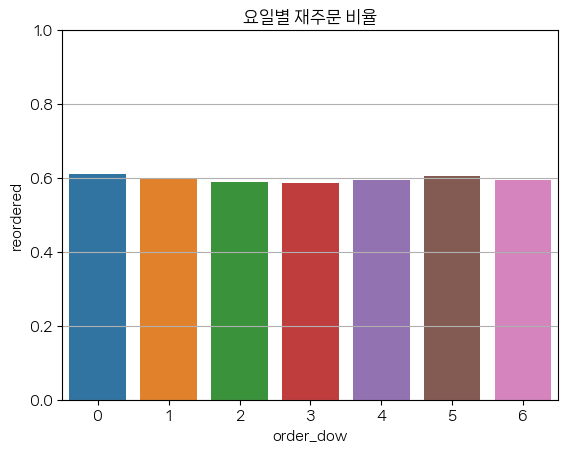

<Figure size 500x400 with 0 Axes>

In [11]:
order_products__train_dow = order_products__train.merge(orders, on="order_id")
plt.grid(visible=True) # 도화지에 선 그리기

plt.title("요일별 재주문 비율")
C = order_products__train_dow[["reordered", "order_dow"]].groupby("order_dow").mean() 
sns.barplot(x=C.index[0:70], y=C["reordered"])
plt.ylim(0, 1)
plt.figure(figsize=(5,4))
plt.show()

In [12]:
C # order_products__train_dow[["reordered", "order_dow"]].groupby("order_dow").mean()

,reordered
order_dow,
0,0.609624
1,0.598977
2,0.588365
3,0.586724
4,0.594632
5,0.606178
6,0.594238


In [13]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
orders["eval_set"].unique() # orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

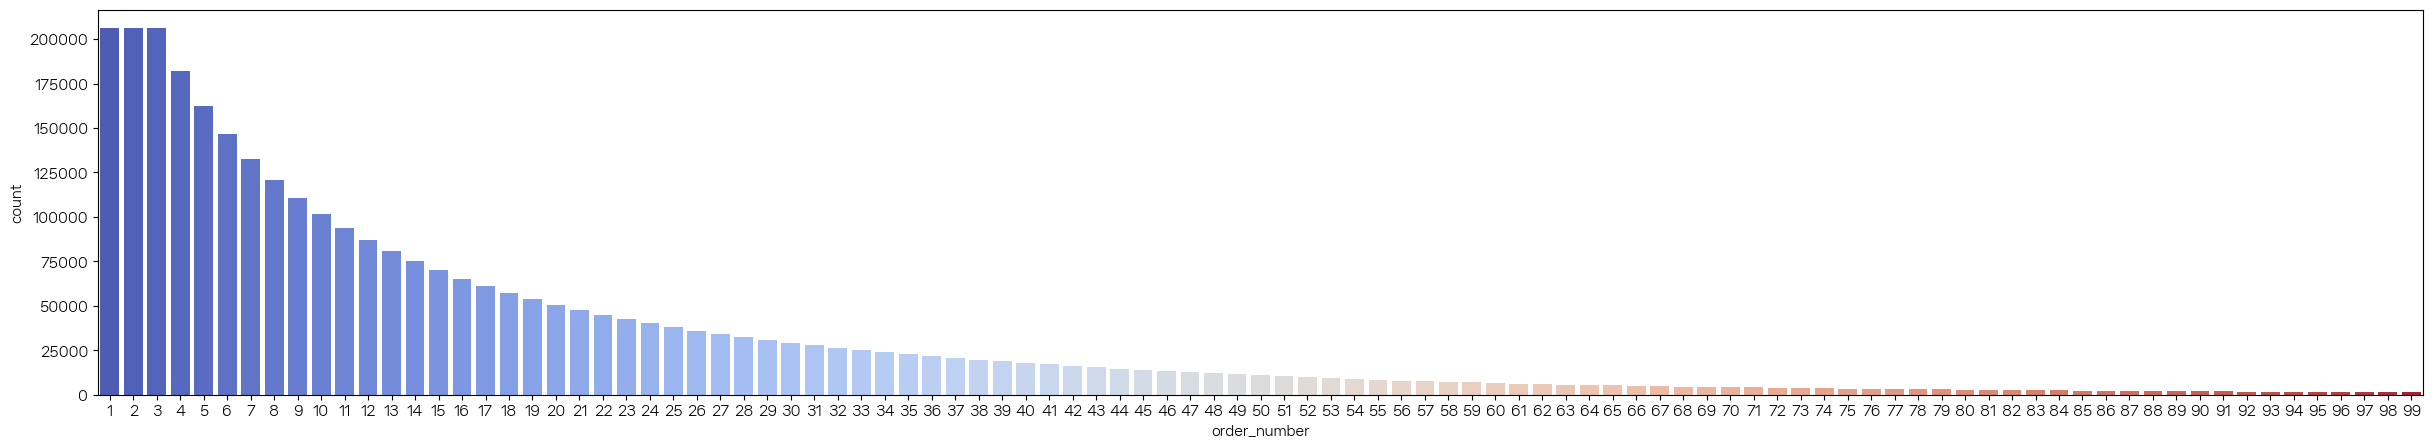

In [15]:
# prior 데이터에서 주문 횟수에 따른 User 수
plt.figure(figsize=(30,5))
sns.countplot(data=orders.loc[orders.eval_set=="prior"], x="order_number", palette="coolwarm");

In [17]:
orders[(orders["order_number"] == 4) & (orders["eval_set"] == "prior")].shape

(182223, 7)

In [18]:
np.sum(pd.isnull(orders))

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [19]:
# days_since_prior_order에 대한 결측치 0으로 채우기
# days_since_prior_order=Null이라는 거는 첫 구매라는 말 맞나?
orders.fillna(0, inplace=True)

In [20]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [23]:
orders["user_id"].nunique()

206209

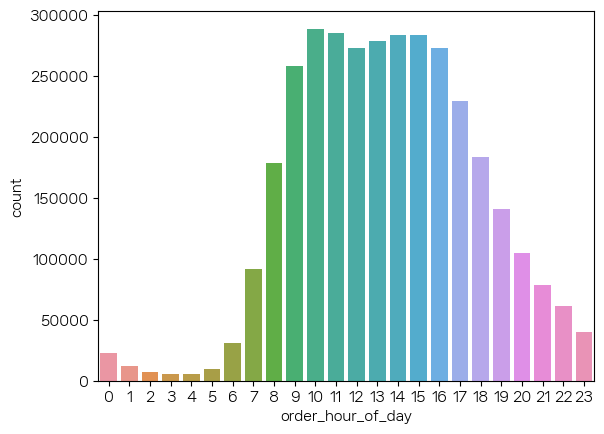

In [24]:
# 시간에 따른 주문 수
sns.countplot(data=orders, x="order_hour_of_day")
plt.show()

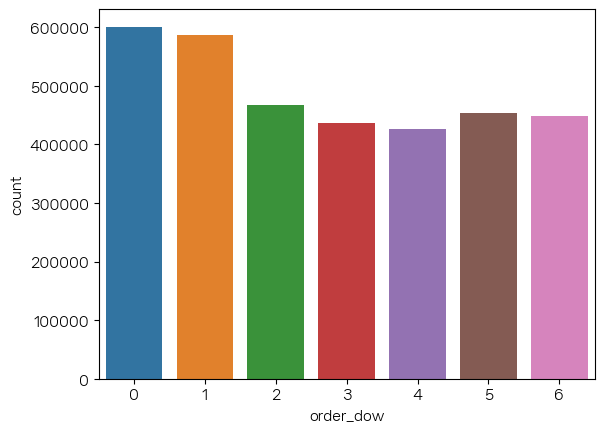

In [25]:
# 요일별 주문 수
sns.countplot(data=orders, x="order_dow")
plt.show()

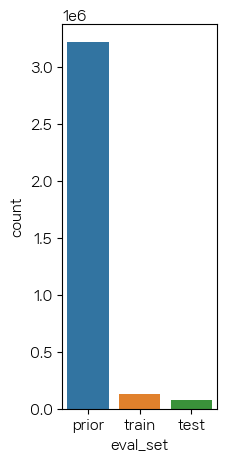

In [33]:
plt.figure(figsize=(2,5))
sns.countplot(data=orders, x="eval_set");

In [34]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [35]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [38]:
order_products__train_merged = order_products__train.merge(products, on="product_id")
order_products__train_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


In [39]:
# 가장 많이 판매된 상품 top 10
best_seller_products = order_products__train_merged.product_name.value_counts().nlargest(10)
best_seller_products

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: product_name, dtype: int64

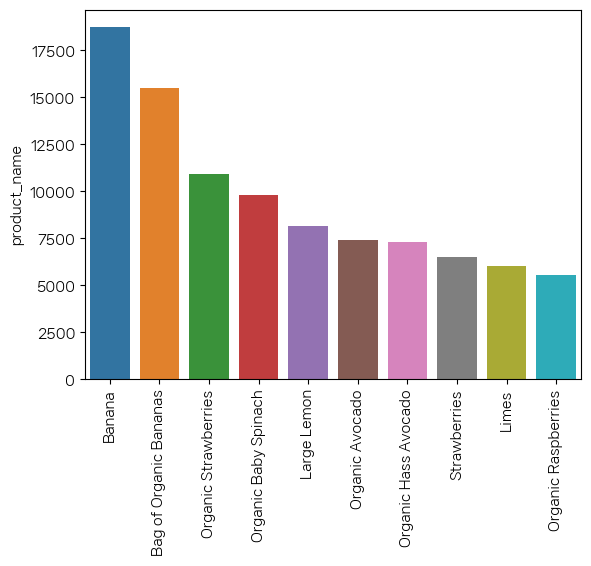

In [45]:
sns.barplot(x=best_seller_products.index, y=best_seller_products)
plt.xticks(rotation=90);

In [47]:
display(order_products__train["reordered"].value_counts())
order_products__train["reordered"].value_counts(1)

1    828824
0    555793
Name: reordered, dtype: int64

1    0.598594
0    0.401406
Name: reordered, dtype: float64

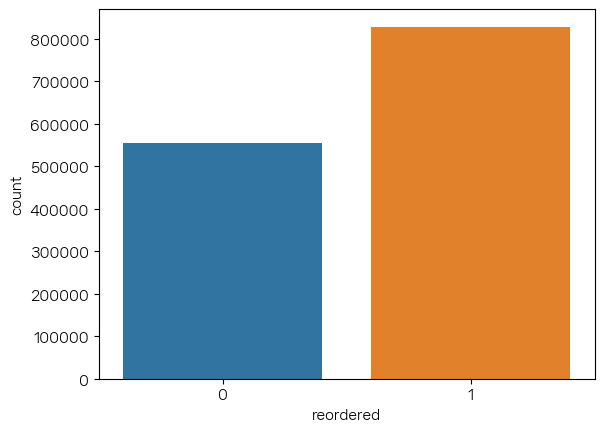

In [48]:
# train 셋에서 재주문 여부
sns.countplot(data=order_products__train, x="reordered");

In [49]:
pd.options.display.max_rows = 999
order_products__train_merged.sample(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
634644,1586983,5025,4,1,Green Onions,83,4
330575,1935610,14197,15,1,Tomato Paste,9,9
414118,2401015,22888,4,1,90% Lean Ground Beef,122,12
264307,1097363,34969,5,1,Red Vine Tomato,83,4
612948,342717,24373,18,0,Mediterranean Vegetable Chips,107,19


In [50]:
# 유기농 제품과 비유기농 제품
order_products__train_merged['Organic or Not'] = order_products__train_merged.product_name.str.lower().str.contains('organic')
order_products__train_merged['Organic or Not'].replace({True:'Organic', False:'Not-Organic'}, inplace=True)
order_products__train_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,Organic or Not
0,1,49302,1,1,Bulgarian Yogurt,120,16,Not-Organic
1,816049,49302,7,1,Bulgarian Yogurt,120,16,Not-Organic
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,Not-Organic
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,Not-Organic
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,Not-Organic


In [52]:
order_products__train_merged['Organic or Not'].value_counts(1)

Not-Organic    0.707055
Organic        0.292945
Name: Organic or Not, dtype: float64

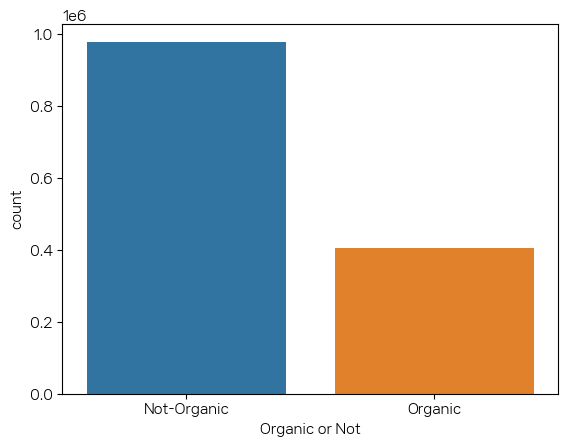

In [59]:
# 유기농, 비유기농 개수 시각화
sns.countplot(data=order_products__train_merged, 
             x=order_products__train_merged['Organic or Not']);

In [60]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


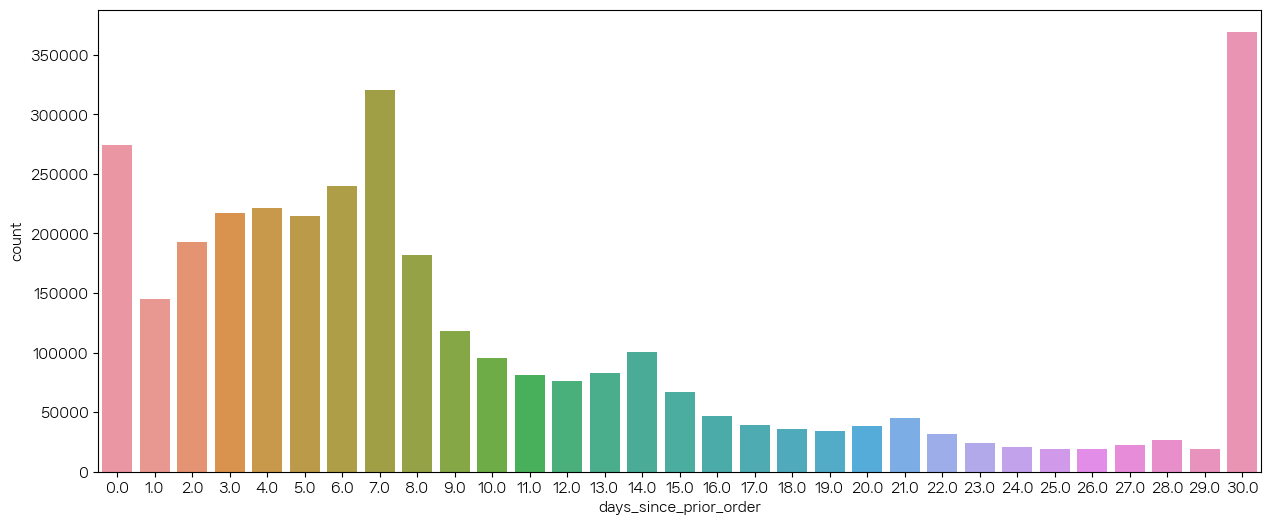

In [64]:
# 제일 최근 주문과 그 전 주문 사이의 차이 일수
plt.figure(figsize=(15,6))
sns.countplot(data=orders, x="days_since_prior_order");

In [66]:
product_aisle = products.merge(aisles, on='aisle_id')
product_aisle.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [71]:
order_products__prior_aisle = order_products__prior.merge(product_aisle, on='product_id')

In [73]:
order_products__prior_aisle.tail()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
32434484,3265099,43492,3,0,Gourmet Burger Seasoning,104,13,spices seasonings
32434485,3361945,43492,19,0,Gourmet Burger Seasoning,104,13,spices seasonings
32434486,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,15,canned jarred vegetables
32434487,3393151,38977,32,0,Original Jerky,100,21,missing
32434488,3400803,23624,7,0,Flatbread Pizza All Natural,79,1,frozen pizza


In [74]:
# aisle에 따른 User들의 상품 구매 개수
A = order_products__prior_aisle[["aisle_id", "aisle"]].groupby(by="aisle").count().sort_values(by="aisle_id", ascending=False)

In [75]:
A.head()

,aisle_id
aisle,
fresh fruits,3642188
fresh vegetables,3418021
packaged vegetables fruits,1765313
yogurt,1452343
packaged cheese,979763


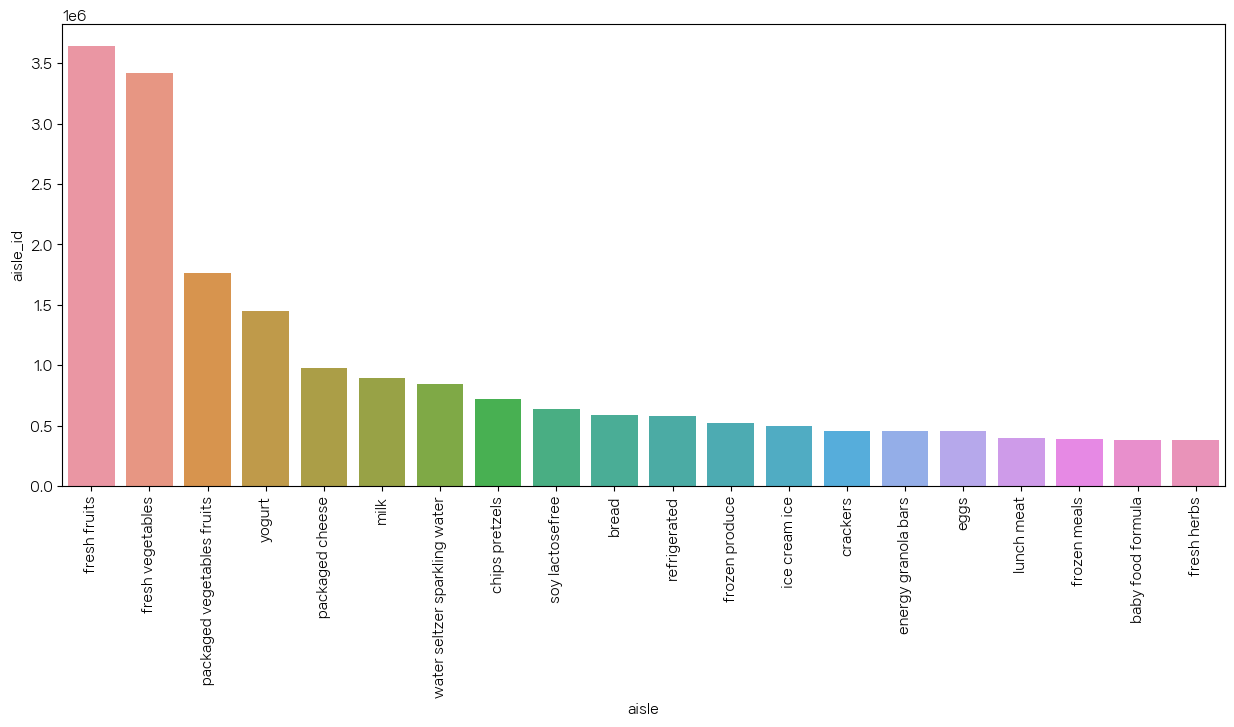

In [91]:
# 가장 많이 판매된 aisle?
plt.figure(figsize=(15,6))
sns.barplot(data=A, x=A.index[:20], y=A.aisle_id[0:20])
plt.xticks(rotation=90);

In [92]:
order_products__prior_aisle_dep = order_products__prior_aisle.merge(departments, on='department_id')
order_products__prior_aisle_dep.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


In [99]:
# department에서 재구매율 비율
B= order_products__prior_aisle_dep[['reordered','department']].groupby('department').mean()
B

,reordered
department,
alcohol,0.569924
babies,0.578971
bakery,0.628141
beverages,0.65346
breakfast,0.560922
bulk,0.57704
canned goods,0.457405
dairy eggs,0.669969
deli,0.607719


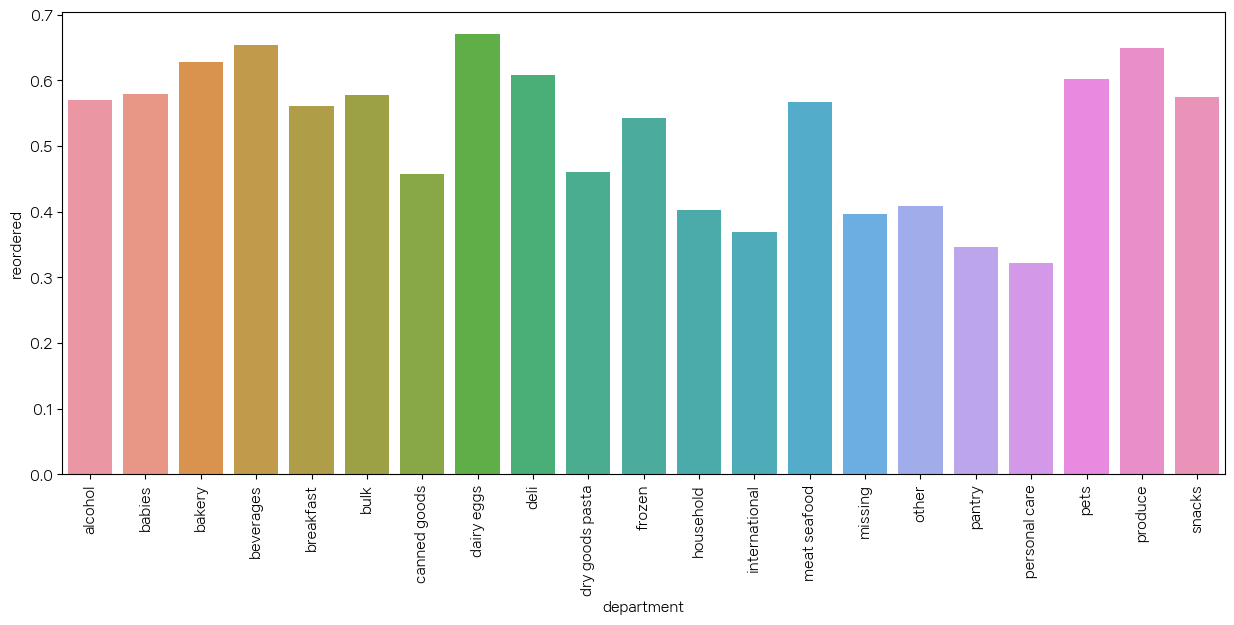

In [110]:
plt.figure(figsize=(15,6))
sns.barplot(data=B, x=B.index, y=B["reordered"], )
plt.xticks(rotation=90);

In [123]:
# 장바구니에 추가하는 순서와 재구매 비율
# 끝으로 갈수록 비율이 다시 커지는데 횟수가 작아지면서 생기는 이상치라 해야하나.. 아무튼 그러한 이유로 확률이 커진다
# 횟수가 줄어들기 때문에! -> 확실히 mean말고 count로 하면 횟수가 줄어드는 게 보인다.
C= order_products__prior_aisle_dep[['reordered','add_to_cart_order']].groupby('add_to_cart_order').mean()
C

,reordered
add_to_cart_order,
1,0.677533
2,0.676251
3,0.658037
4,0.636958
5,0.617383
6,0.60042
7,0.585687
8,0.573247
9,0.561474


<AxesSubplot:xlabel='add_to_cart_order', ylabel='reordered'>

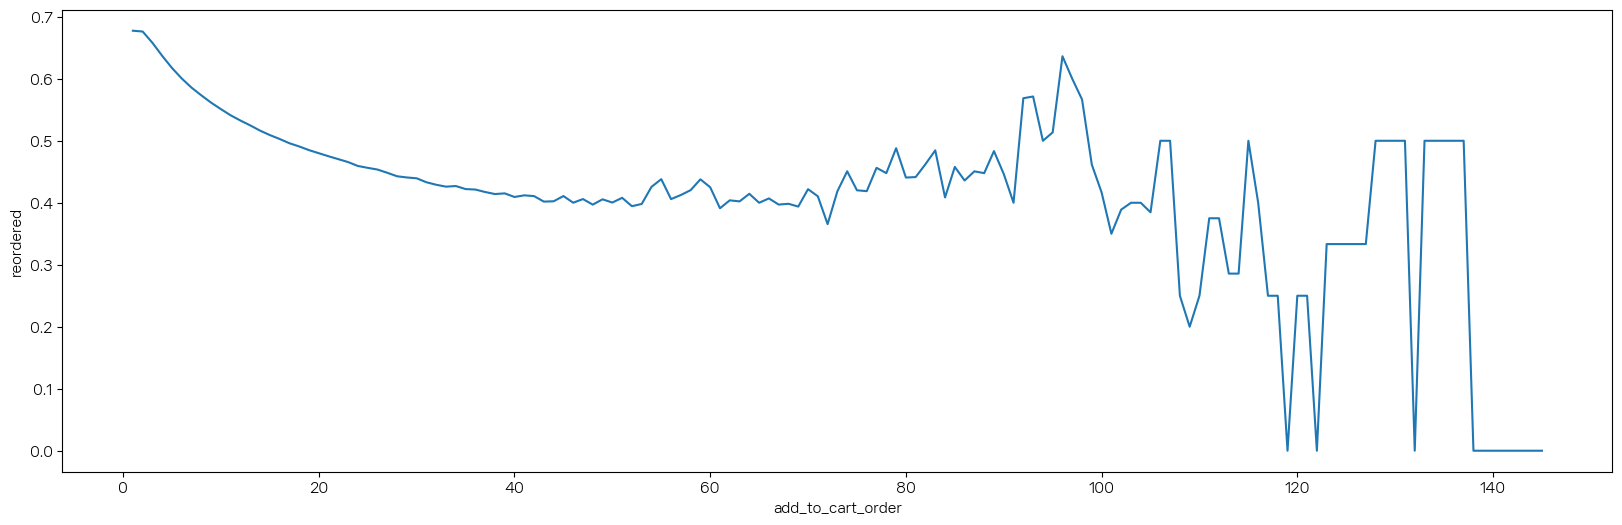

In [124]:
plt.figure(figsize=(20,6))
sns.lineplot(x=C.index, y=C.reordered)

# 아무래도 이상치는 제거하는 게 좋을 듯하다!

C:\Users\wldus\AppData\Local\Temp\ipykernel_24940\1890581988.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.lineplot(x=C.index[0:60], y=C.reordered[0:60])


<AxesSubplot:xlabel='add_to_cart_order', ylabel='reordered'>

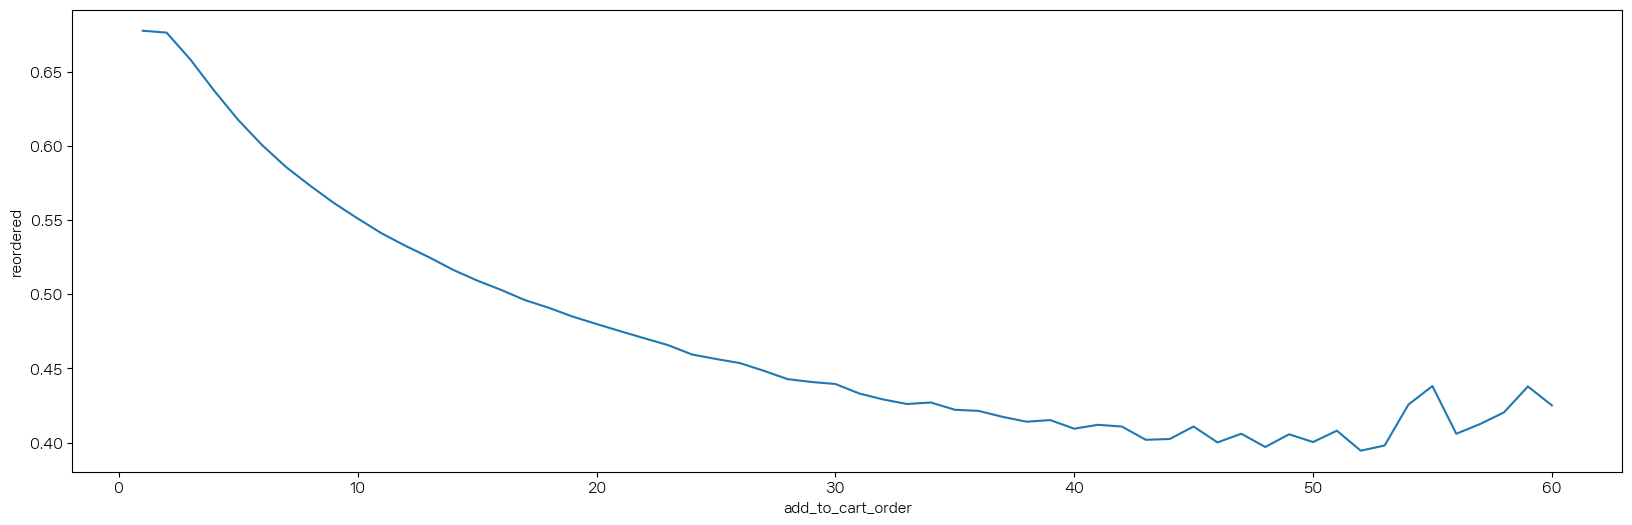

In [133]:
# C에서 이상치를 제외한 그래프(최대 60까지만, 어디까지 제외할 건지 고민이 필요)
# 경고 메시지 제거 어떻게 함..?
# 확실히 줄어드는 걸 볼 수 있다
plt.figure(figsize=(20,6))
sns.lineplot(x=C.index[0:60], y=C.reordered[0:60])

<AxesSubplot:xlabel='department', ylabel='count'>

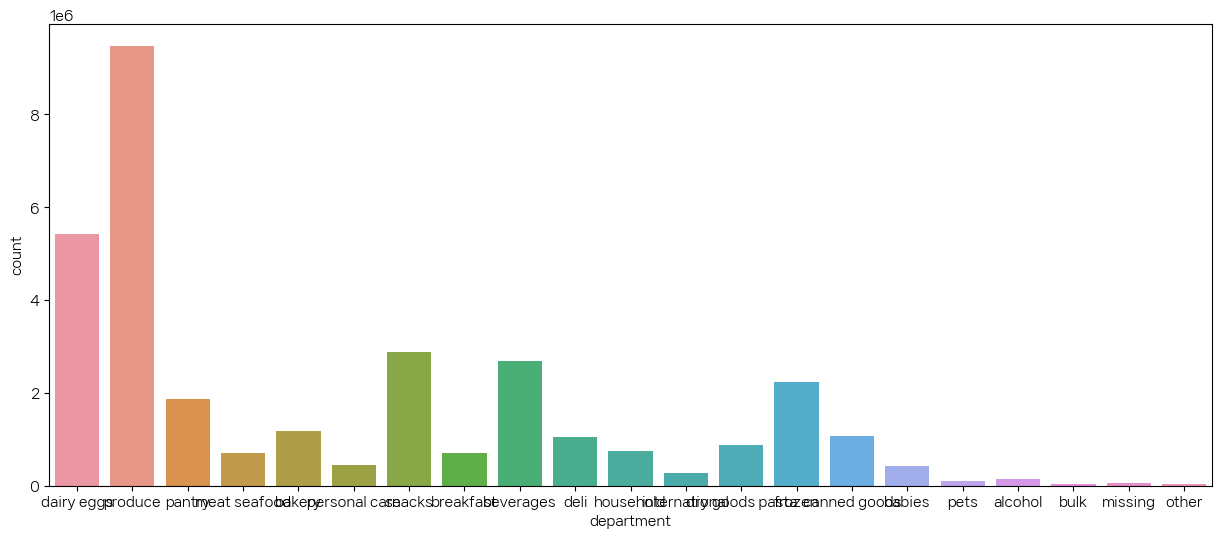

In [136]:
plt.figure(figsize=(15,6))
sns.countplot(data=order_products__prior_aisle_dep, x=order_products__prior_aisle_dep["department"])

In [137]:
order_products__prior_aisle_dep['department'].value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64